<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/JDRath/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('/acceleration.csv')
data

,Time (s),Rotation x (rad/s),Rotation y (rad/s),Rotation z (rad/s)
0,0.002173,0.1410,0.9830,0.587
1,0.022200,0.1320,1.1200,0.621
2,0.042228,0.1210,1.1000,0.647
3,0.062256,0.0971,0.8970,0.669
4,0.082284,0.0786,0.6660,0.688
...,...,...,...,...
375,7.512566,-0.0623,-0.4670,-0.322
376,7.532593,-0.0597,-0.2800,-0.302
377,7.552621,-0.0550,-0.0822,-0.266
378,7.572649,-0.0561,0.0506,-0.229


<Axes: >

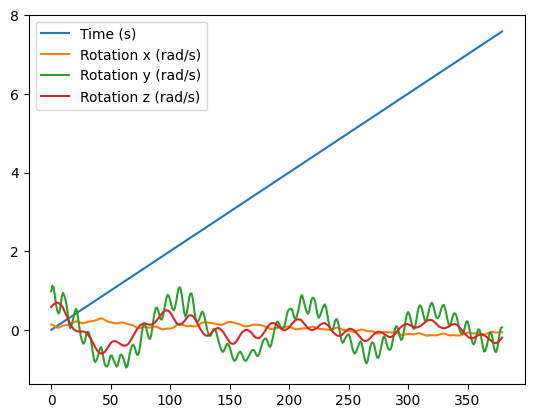

In [10]:
data.plot()

<Axes: >

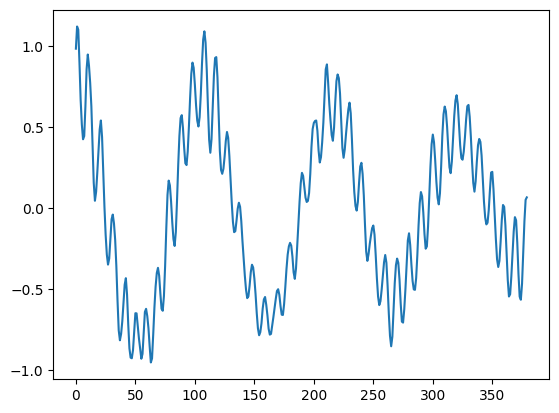

In [11]:
data['Rotation y (rad/s)'].plot()

<Axes: >

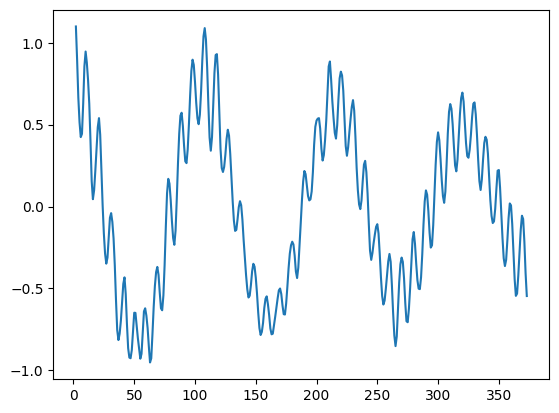

In [12]:
data['Rotation y (rad/s)'] \
  [(data['Rotation y (rad/s)'].index<374) & \
    (data['Rotation y (rad/s)'].index>1)] \
    .plot()

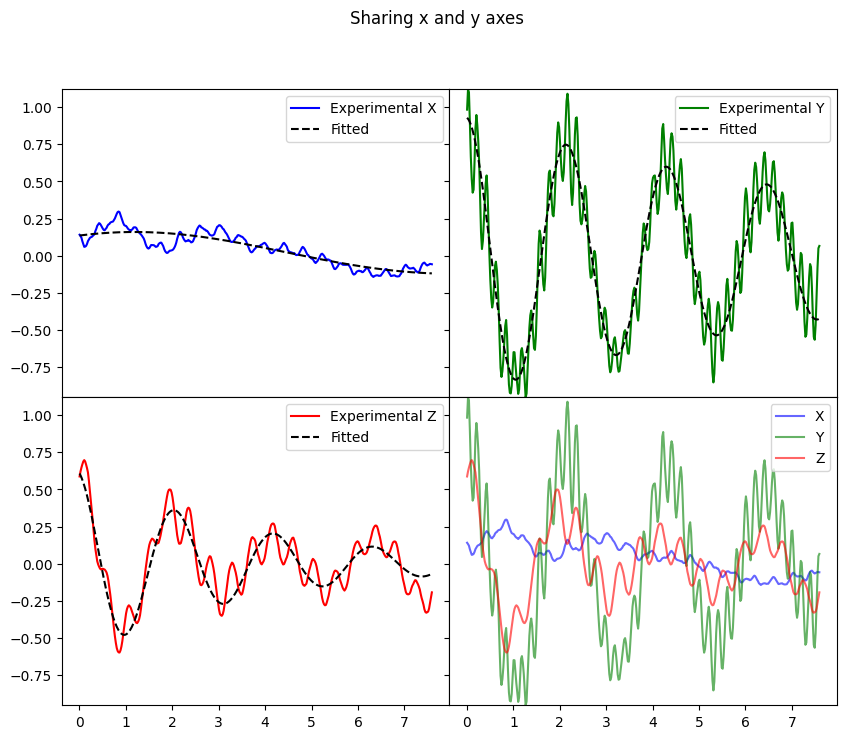

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load CSV file
data = pd.read_csv("/acceleration.csv")

# Rename columns
data = data.rename(columns={"Time (s)": "time",
                            "Rotation x (rad/s)": "x",
                            "Rotation y (rad/s)": "y",
                            "Rotation z (rad/s)": "z"})

# Convert to numbers and sort
data = data.apply(pd.to_numeric, errors="coerce").dropna().sort_values("time")

# Damped oscillation function
def damped_oscillation(t, A, lambda_, omega, phi):
    return A * np.exp(-lambda_ * t) * np.cos(omega * t + phi)

# Function to fit and return parameters
def fit_curve(axis):
    try:
        params, _ = curve_fit(damped_oscillation, data["time"], data[axis], p0=[1, 0.1, 2*np.pi, 0])
        return params
    except:
        return None

# Fit each axis
params_x, params_y, params_z = fit_curve("x"), fit_curve("y"), fit_curve("z")

# Find common y-axis limits
y_min = min(data[["x", "y", "z"]].min())
y_max = max(data[["x", "y", "z"]].max())

# Create subplots (2x2 grid) with no spacing
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Sharing x and y axes")

# Plot function with uniform y-axis scaling
def plot_axis(ax, axis, color, params):
    ax.plot(data["time"], data[axis], label=f"Experimental {axis.upper()}", color=color)
    if params is not None:
        ax.plot(data["time"], damped_oscillation(data["time"], *params), linestyle="dashed", color="black", label="Fitted")
    ax.set_ylim(y_min, y_max)
    ax.legend()

# Plot each rotation
plot_axis(axs[0, 0], "x", "blue", params_x)
plot_axis(axs[0, 1], "y", "green", params_y)
plot_axis(axs[1, 0], "z", "red", params_z)

axs[1, 1].plot(data["time"], data["x"], label="X", color="blue", alpha=0.6)
axs[1, 1].plot(data["time"], data["y"], label="Y", color="green", alpha=0.6)
axs[1, 1].plot(data["time"], data["z"], label="Z", color="red", alpha=0.6)
axs[1, 1].set_ylim(y_min, y_max)
axs[1, 1].legend()

# Remove space between plots
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

Using the data, we find a damping factor of β = 0.05. We can calculate the period from the data and it ends up being a period of T = 2.865 seconds. We then find the natural frequency which is ω = 2.197 rad/sec.

In [7]:
import numpy as np

def calculate_gravity(length, period):
    """Compute gravitational acceleration using pendulum length and period."""
    return (4 * np.pi**2 * length) / (period**2)

def calculate_error(length, period, length_error):
    """Compute the error in gravitational acceleration based on length error."""
    return (4 * np.pi**2 / period**2) * length_error

# Given values
LENGTH = 2.03  # meters
LENGTH_ERROR = 0.001  # meters
PERIOD = 2.86  # seconds

# Compute results
gravity = calculate_gravity(LENGTH, PERIOD)
error = calculate_error(LENGTH, PERIOD, LENGTH_ERROR)

# Display results
print(f"Gravitational Acceleration: {gravity:.4f} m/s²")
print(f"Error in Gravitational Acceleration: {error:.4f} m/s²")

Gravitational Acceleration: 9.7977 m/s²
Error in Gravitational Acceleration: 0.0048 m/s²
